In [1]:
#!pip install dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input,Output
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
from keras.models import load_model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

<ipython-input-1-2c4724a47455>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-2c4724a47455>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
from dash import dash_table


In [3]:
model_SVR = SVR( kernel="rbf", C=900 ,gamma=0.0008 )

In [4]:
#Upload dataFrame

df_B=pd.read_csv("btcusd.csv")
data_B=df_B.drop(['Date'],axis=1)
# Create standardizer
standardizer_B = StandardScaler()

In [5]:
# Fit standardizer to dataframe
standardizer_B.fit(data_B)
# Apply to data
data_std_B=standardizer_B.transform(data_B)
data_train_B,data_test_B = train_test_split(data_std_B ,test_size=0.3, shuffle=False)
train_B,test_B=train_test_split(data_B ,test_size=0.3, shuffle=False)


In [6]:
X_train_B = []
Y_train_B = []
for i in range(len(data_train_B)):
    X_train_B.append([data_train_B[i][0],data_train_B[i][1],data_train_B[i][2],data_train_B[i][5]])
    Y_train_B.append(data_train_B[i][3])

X_train_B.remove(X_train_B[len(X_train_B)-1])
Y_train_B.remove(Y_train_B[0])


X_train_B =np.array(X_train_B) # Open,Low,High,Volume
Y_train_B=np.array(Y_train_B) # Close

X_train_B[len(X_train_B)-1]

X_test_B = []
Y_test_B = []
for i in range(len(data_test_B)):
    X_test_B.append([data_test_B[i][0],data_test_B[i][1],data_test_B[i][2],data_test_B[i][5]])
    Y_test_B.append(data_test_B[i][3])

X_test_B.remove(X_test_B[len(X_test_B)-1])
Y_test_B.remove(Y_test_B[0])

X_test_B =np.array(X_test_B) 
Y_test_B=np.array(Y_test_B)

In [7]:
regressor_B = LinearRegression()
regressor_B.fit(X_train_B,Y_train_B)
#Linear Regression Prediction
predicted_LR_B = regressor_B.predict(X_test_B)
#SVR Prediction
model_SVR.fit( X_train_B , Y_train_B )
predicted_SVR_B = model_SVR.predict( X_test_B )

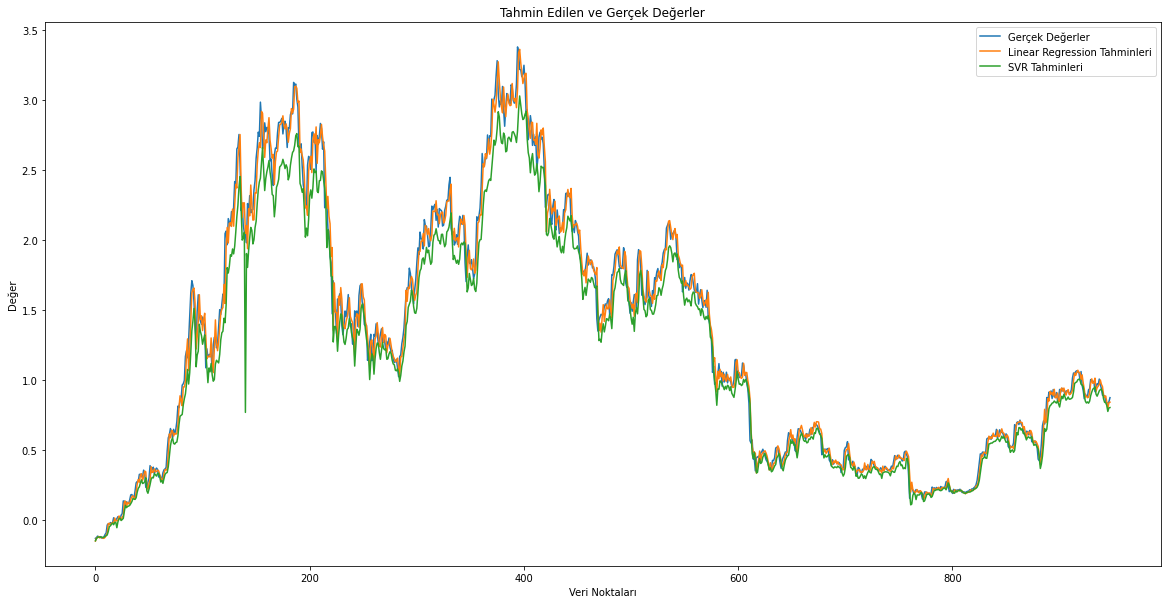

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
# Gerçek değerlerin grafiği
plt.plot(Y_test_B, label='Gerçek Değerler')

# Linear Regression tahminlerinin grafiği
plt.plot(predicted_LR_B, label='Linear Regression Tahminleri')

# SVR tahminlerinin grafiği
plt.plot(predicted_SVR_B, label='SVR Tahminleri')

plt.title('Tahmin Edilen ve Gerçek Değerler')
plt.xlabel('Veri Noktaları')
plt.ylabel('Değer')
plt.legend()
plt.show()


In [9]:
from sklearn import metrics
# Lineer Regresyon değerlendirme metrikleri
linear_r2 = metrics.r2_score(Y_test_B, predicted_LR_B)
linear_mae = metrics.mean_absolute_error(Y_test_B, predicted_LR_B)
linear_mse = metrics.mean_squared_error(Y_test_B, predicted_LR_B)
linear_rmse = np.sqrt(linear_mse)



In [10]:
svr_r2 = metrics.r2_score(Y_test_B, predicted_SVR_B)
svr_mae = metrics.mean_absolute_error(Y_test_B, predicted_SVR_B)
svr_mse = metrics.mean_squared_error(Y_test_B, predicted_SVR_B)
svr_rmse = np.sqrt(svr_mse)


In [11]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {
    'MSE': [linear_mse, svr_mse],
    'RMSE': [linear_rmse, svr_rmse],
    'MAE': [linear_mae, svr_mae],
    'R2': [linear_r2, svr_r2]
}

# DataFrame oluştur ve index değerlerini Lineer Regresyon ve SVR olarak ata
error_df = pd.DataFrame(results, index=['Lin R', 'RFB'])

# ERROR'u yazdır
print(error_df)


            MSE      RMSE       MAE        R2
Lin R  0.008874  0.094202  0.062311  0.988528
RFB    0.030600  0.174929  0.123823  0.960441


In [12]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {
    'MSE': [linear_mse, svr_mse],
    'RMSE': [linear_rmse, svr_rmse],
    'MAE': [linear_mae, svr_mae],
    'R2': [linear_r2, svr_r2]
}

# DataFrame oluştur ve index değerlerini kısaltmalar olarak ata
SVR2_ERROR_df = pd.DataFrame(results, index=['LR', 'RBF'])

# Çıktıyı metin dosyasına aktar
output_text = SVR2_ERROR_df.to_string()

# Metin dosyasını kaydet
with open('SVR2_ERROR.txt', 'w') as file:
    file.write(output_text)


In [13]:
data_B

,Open,High,Low,Close,Adj Close,Volume
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
3158,27621.085938,27621.941406,26781.826172,27000.789063,27000.789063,16724343943
3159,26987.662109,27055.646484,25878.429688,26804.990234,26804.990234,19313599897
3160,26807.769531,27030.482422,26710.873047,26784.078125,26784.078125,9999171605
3161,26788.974609,27150.976563,26661.355469,26930.638672,26930.638672,10014858959
